# Covid-19 Simple Data Analysis

In [161]:
import requests
import json
from bs4 import BeautifulSoup 
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 7

### Data source

In [162]:
url_json = "https://especiais.g1.globo.com/bemestar/coronavirus/mapa-coronavirus/data/brazil-cases.json"
json_data = requests.get(url_json,headers = {'User-Agent': 'Mozilla/5.0'})

json_data = json_data.json()
updated_at = json_data['updated_at']

print(f"Última atualização: {updated_at}.")

Última atualização: 29/03/2020, às 17:15.


### Checking and cleaning data

In [163]:
#df_json[df_json['date']=='Não informado']

In [164]:
#json_data.json()['docs']
df_json = pd.DataFrame(json_data['docs'])
df_json = df_json.sort_values(by='date', ascending=False)

# parse state
df_json['state'] = df_json['state'].astype('str')

# checking date
df_json['date'] = pd.to_datetime(df_json['date'], format='%Y-%m-%d',errors='coerce')

# shape
df_json.shape

(810, 7)

In [165]:
# remove invalid dates

df_json = df_json.query('date != "NaT"')
    
df_json = df_json.query('city_name != ""')

df_json.shape

(804, 7)

In [156]:
df_json.dtypes

cases                 int64
city_cod            float64
city_name            object
count                 int64
date         datetime64[ns]
state                object
state_cod           float64
dtype: object

In [157]:
df_json.head(10)

,cases,city_cod,city_name,count,date,state,state_cod
796,2,3122306.0,Divinópolis,7,2020-03-29,MG,31.0
788,26,4314902.0,Porto Alegre,133,2020-03-29,RS,43.0
789,1,3166808.0,Serra do Salitre,1,2020-03-29,MG,31.0
790,1,3157807.0,Santa Luzia,1,2020-03-29,MG,31.0
791,1,3151800.0,Poços de Caldas,2,2020-03-29,MG,31.0
792,3,3144805.0,Nova Lima,19,2020-03-29,MG,31.0
793,1,3143906.0,Muriaé,1,2020-03-29,MG,31.0
794,1,3127701.0,Governador Valadares,2,2020-03-29,MG,31.0
795,1,3125101.0,Extrema,1,2020-03-29,MG,31.0
809,26,1302603.0,Manaus,131,2020-03-29,AM,13.0


In [158]:
df_json.query('city_name == "São Paulo"')

,cases,city_cod,city_name,count,date,state,state_cod
628,171,3550308.0,São Paulo,899,2020-03-26,SP,35.0
553,18,3550308.0,São Paulo,728,2020-03-25,SP,35.0
478,37,3550308.0,São Paulo,710,2020-03-24,SP,35.0
420,91,3550308.0,São Paulo,673,2020-03-23,SP,35.0
356,171,3550308.0,São Paulo,582,2020-03-22,SP,35.0
306,51,3550308.0,São Paulo,411,2020-03-21,SP,35.0
248,102,3550308.0,São Paulo,360,2020-03-20,SP,35.0
184,43,3550308.0,São Paulo,258,2020-03-19,SP,35.0
144,59,3550308.0,São Paulo,215,2020-03-18,SP,35.0
105,11,3550308.0,São Paulo,156,2020-03-17,SP,35.0


### Analyzing 

In [159]:
dfg1 = df_json.groupby(['city_name']).sum().sort_values(by='cases', ascending=False)
dfg1[['cases']].head(30)

,cases
city_name,
São Paulo,899
Rio de Janeiro,489
Brasília,288
Fortaleza,269
Belo Horizonte,143
Porto Alegre,133
Manaus,131
Salvador,94
Curitiba,78


### Visualization

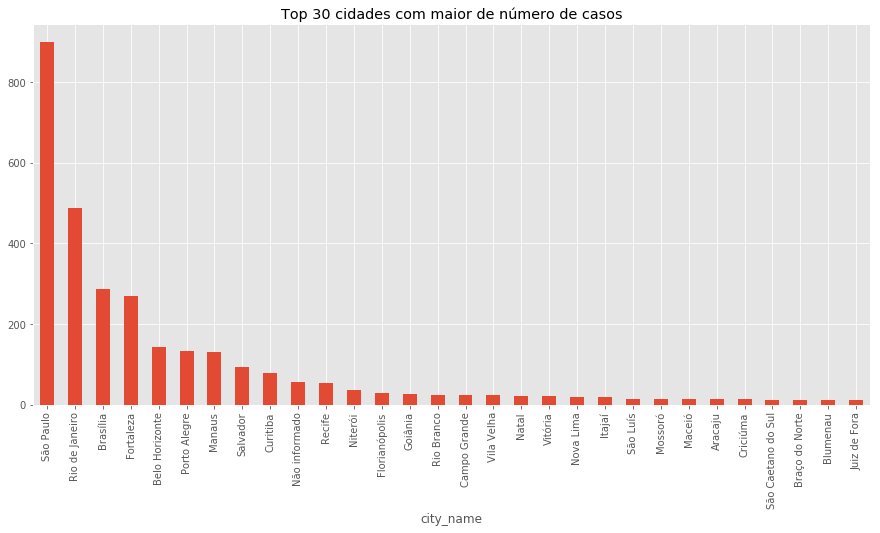

In [160]:
#plot data
top = 30
dfg1.head(top)['cases'].plot.bar()
plt.grid(True)
plt.title(f"Top {top} cidades com maior de número de casos")
plt.show()

In [151]:
def plot_city_curve(city, updated_at):
    df_ = df_json[df_json['city_name'] == city].sort_values(by='date', ascending=True)
    df_ = df_.set_index('date')
    ax = df_.loc[:, 'count'].plot(marker='o', linestyle='-')
    ax.set_ylabel("C a s o s")
    ax.set_xlabel("D a t a")
    
    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    # Turn on the minor TICKS, which are required for the minor GRID
    ax.minorticks_on()    
    
    # Customize the major grid
    ax.grid(which='major', linestyle='-', linewidth='0.5')#, color='red')
    # Customize the minor grid
    ax.grid(which='minor', linestyle=':', linewidth='0.5')#, color='black')    
    
    plt.title(f"{city} [última atualização: {updated_at}]")
    plt.grid(True)
    plt.show()

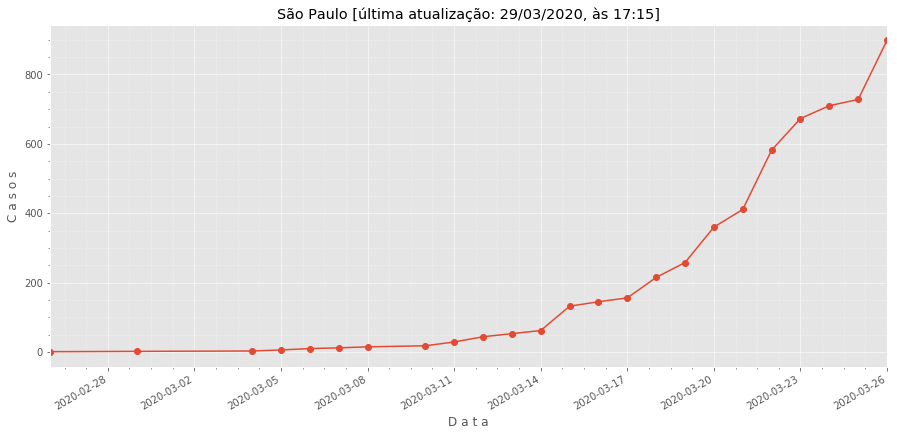

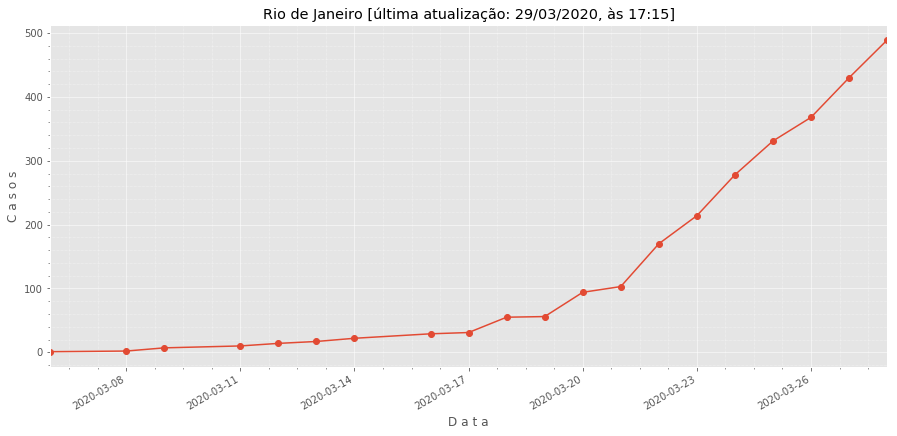

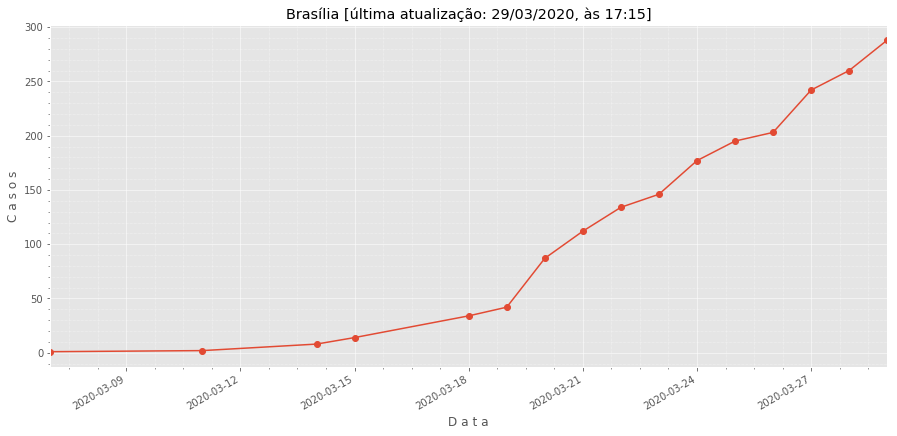

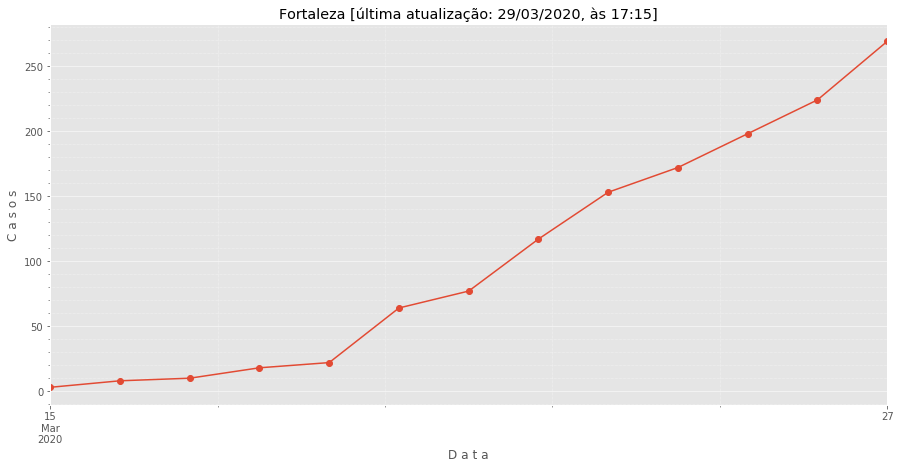

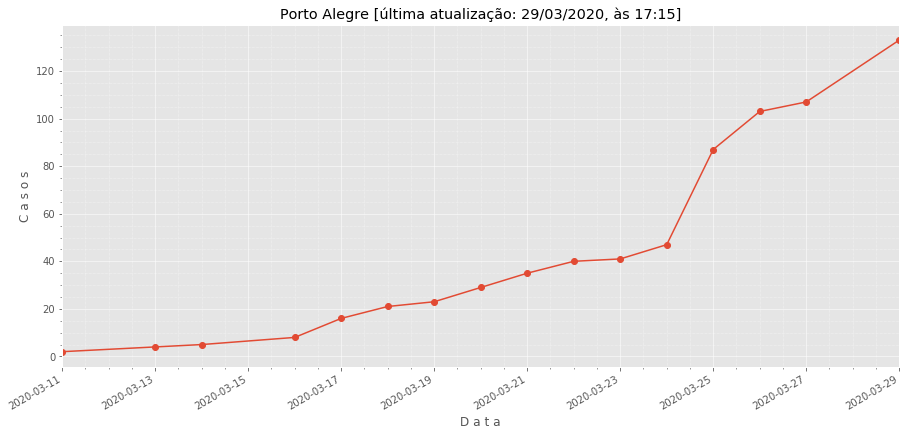

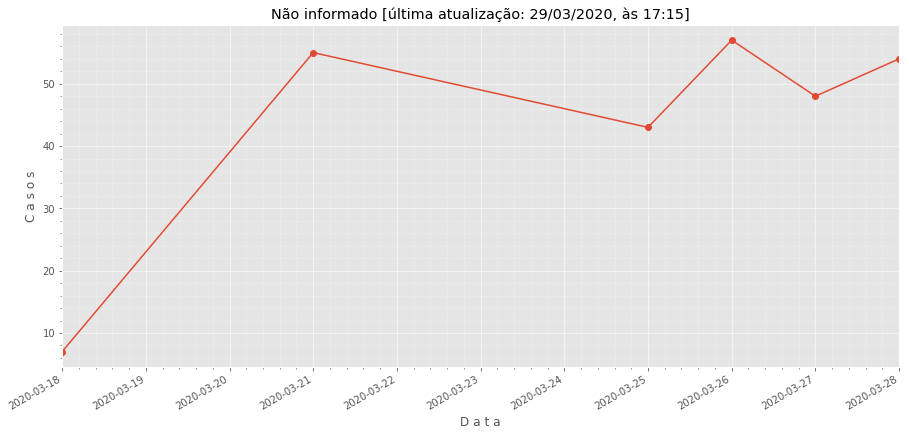

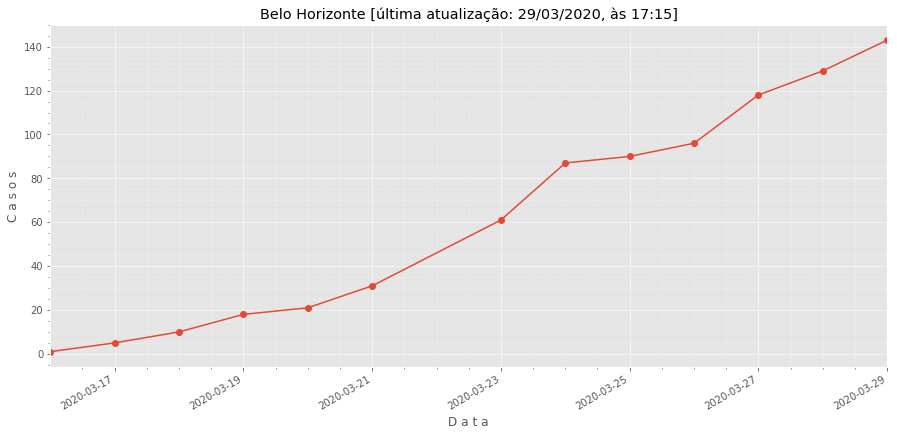

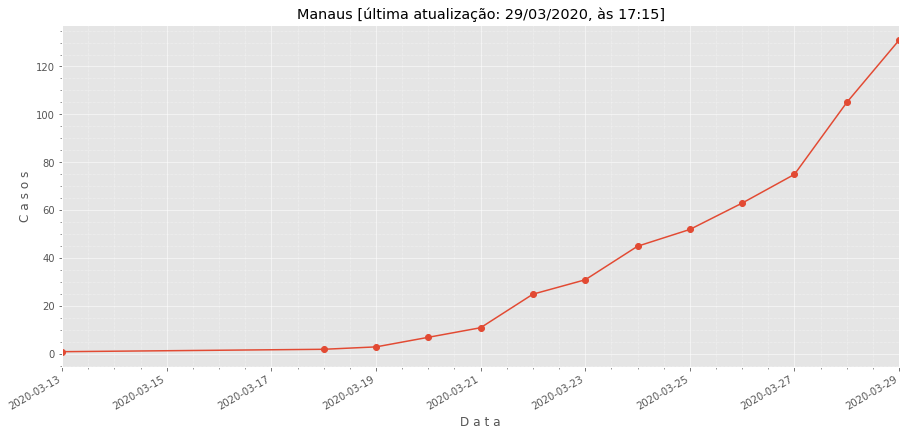

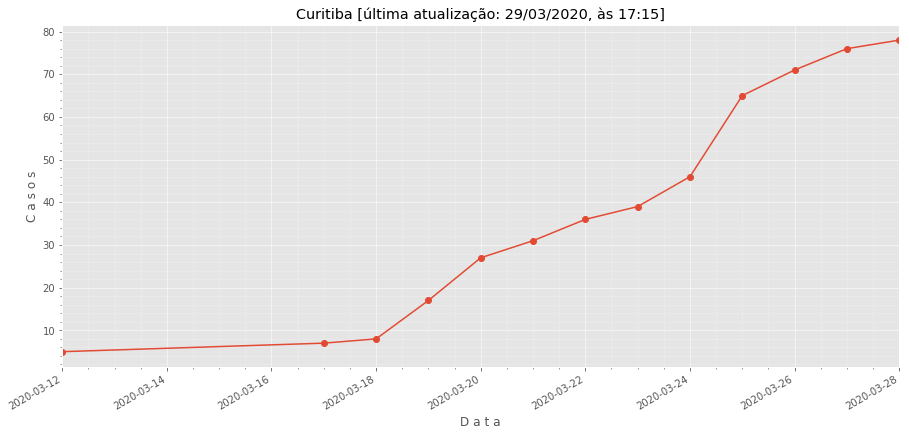

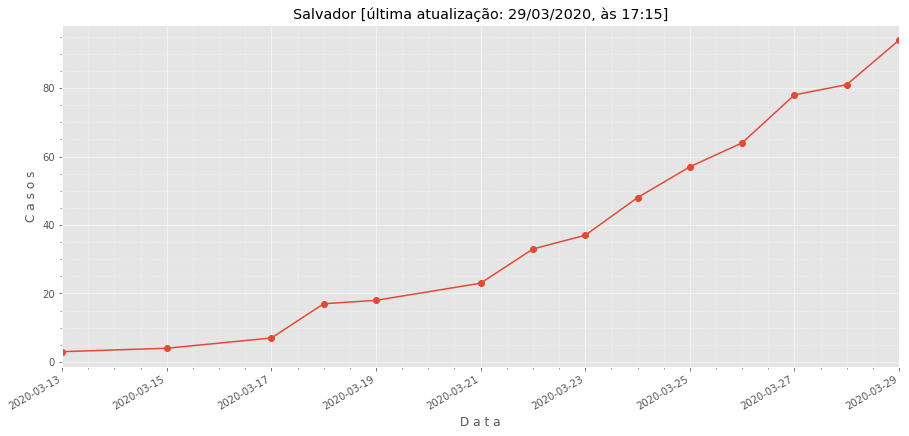

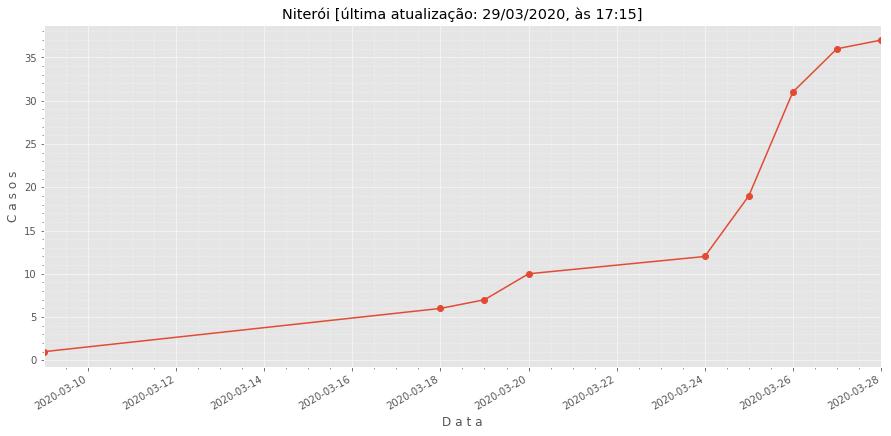

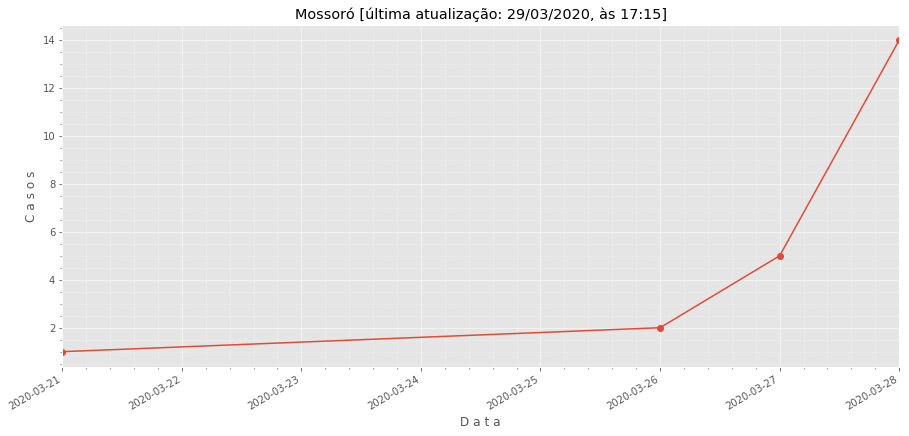

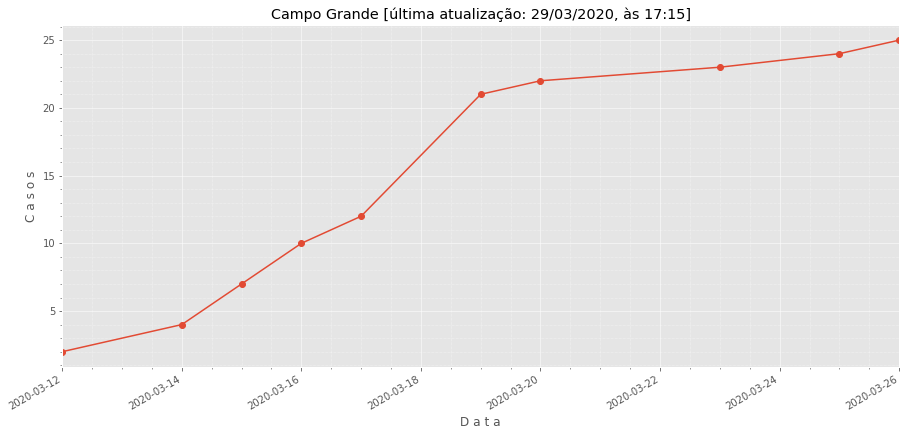

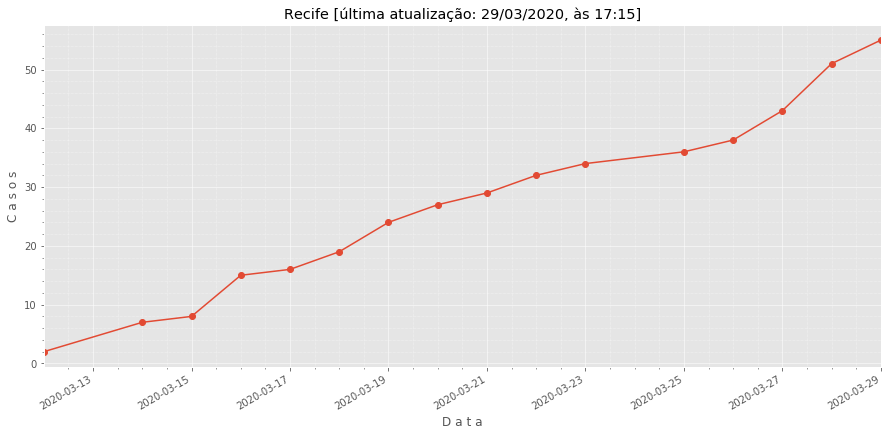

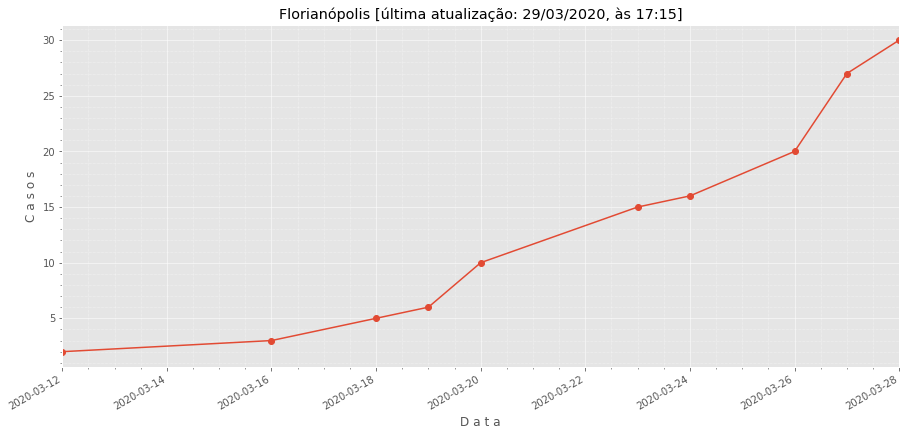

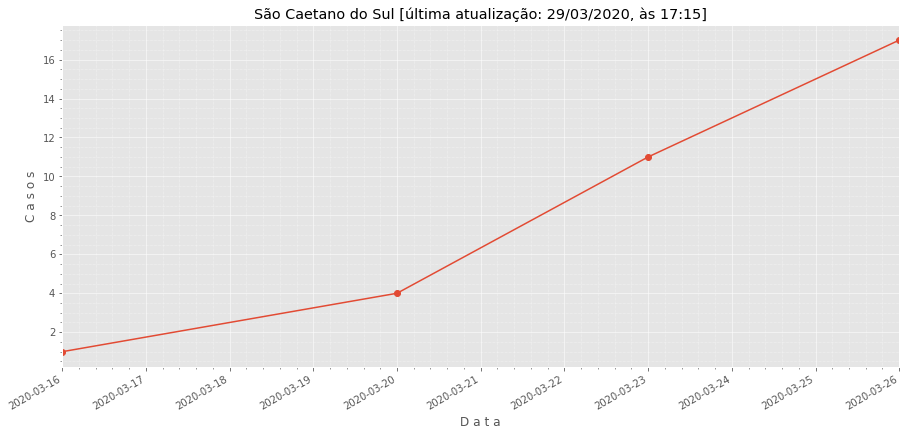

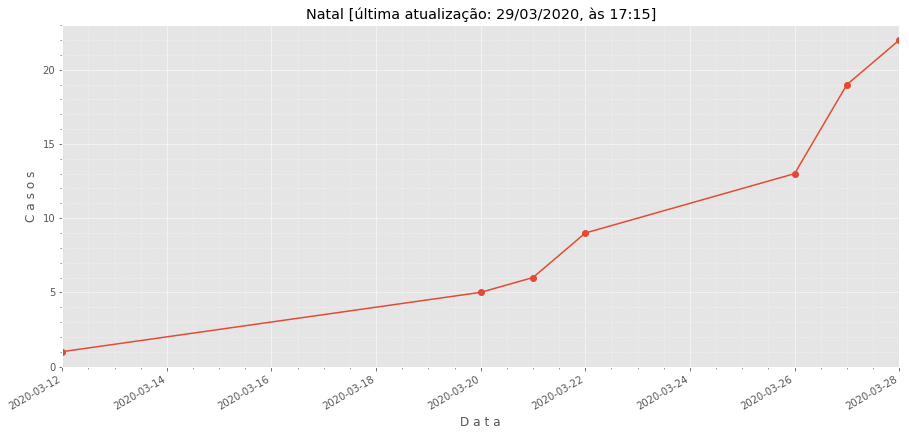

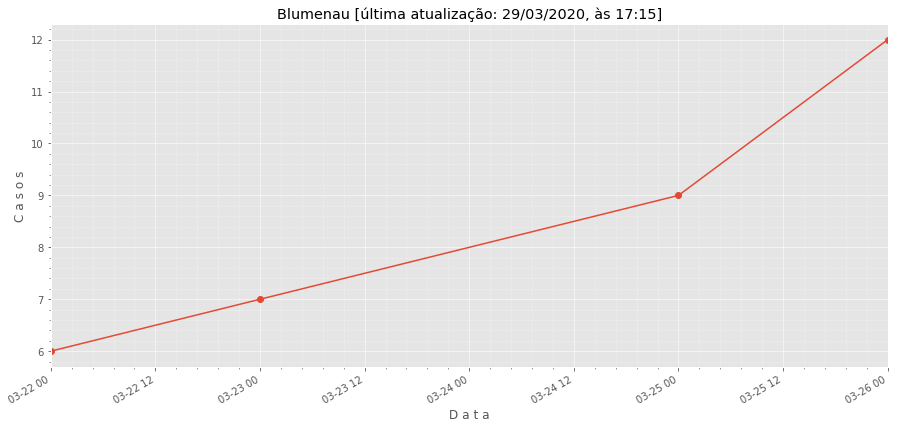

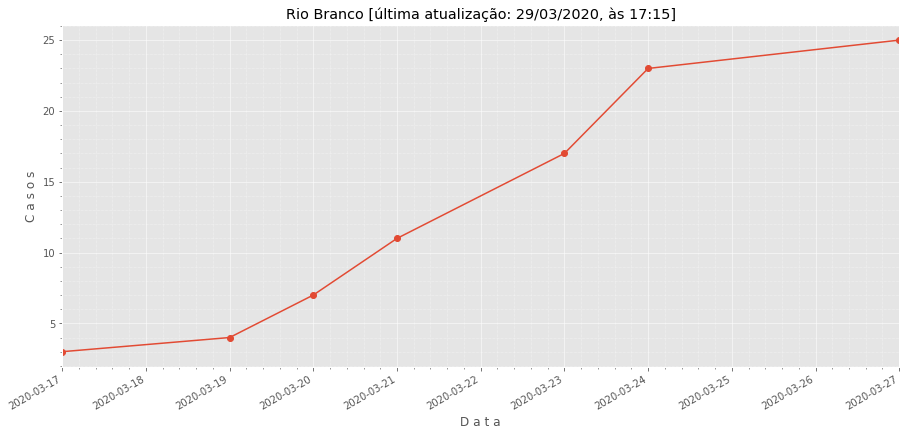

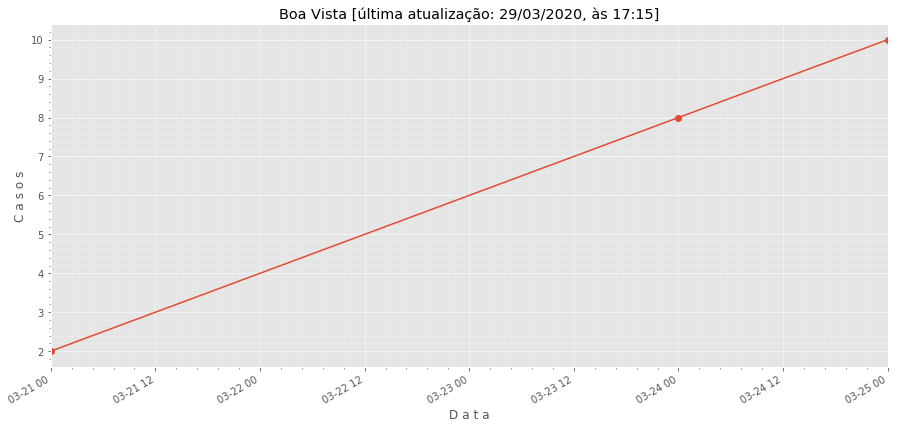

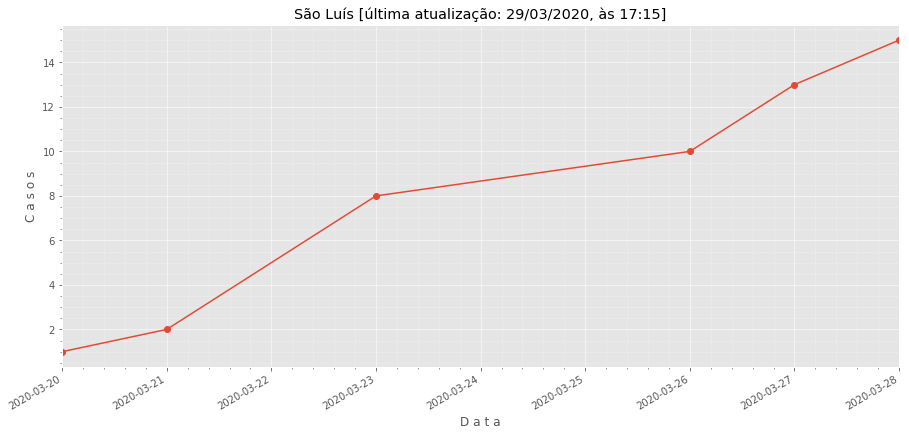

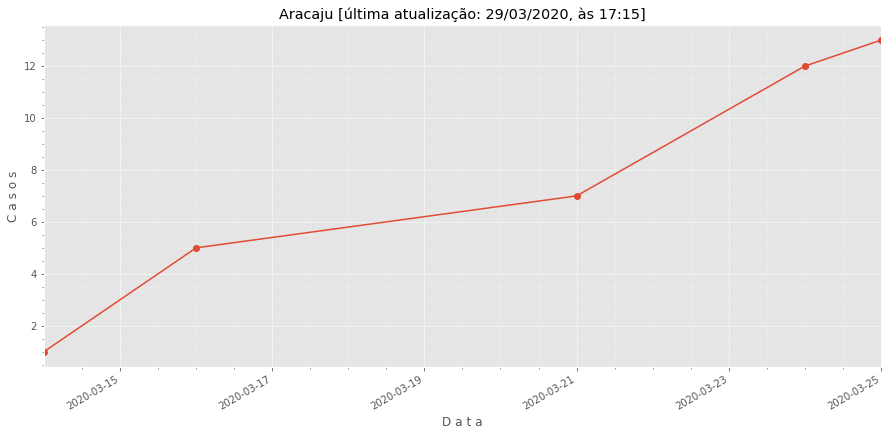

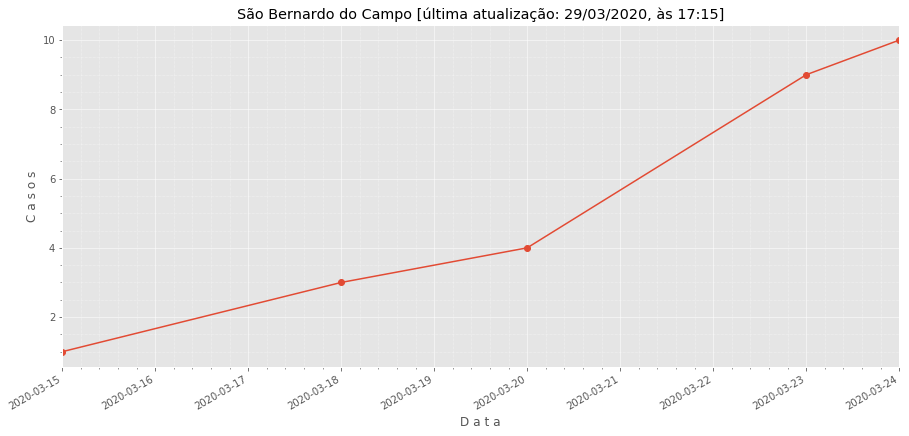

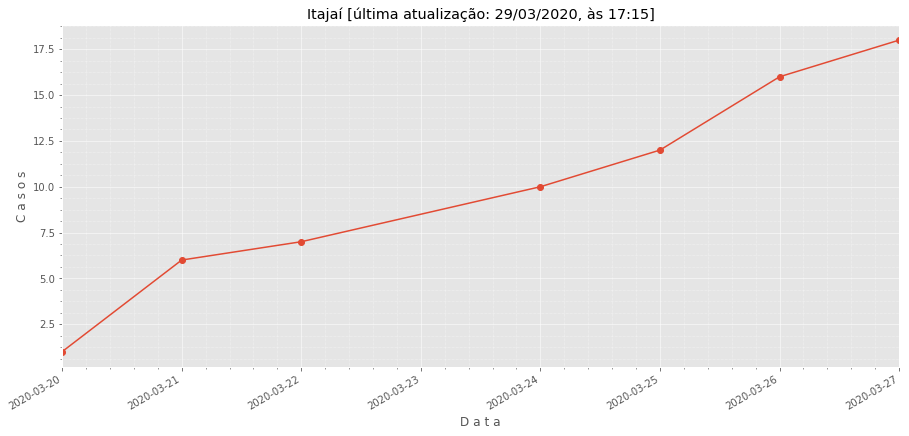

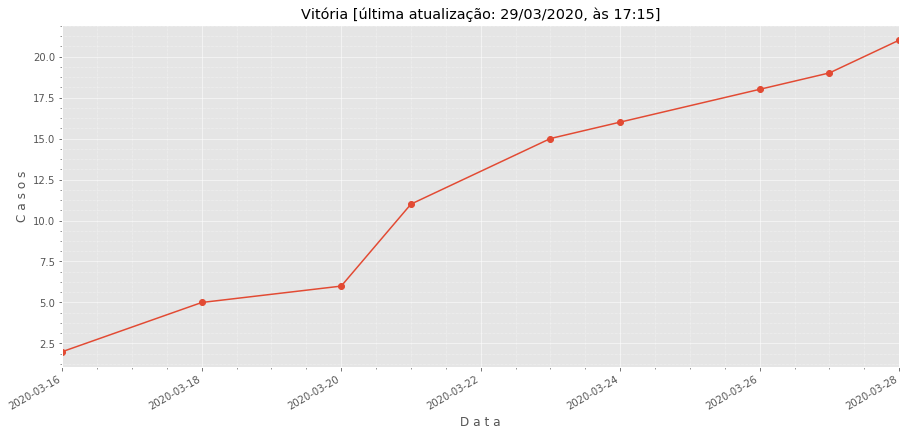

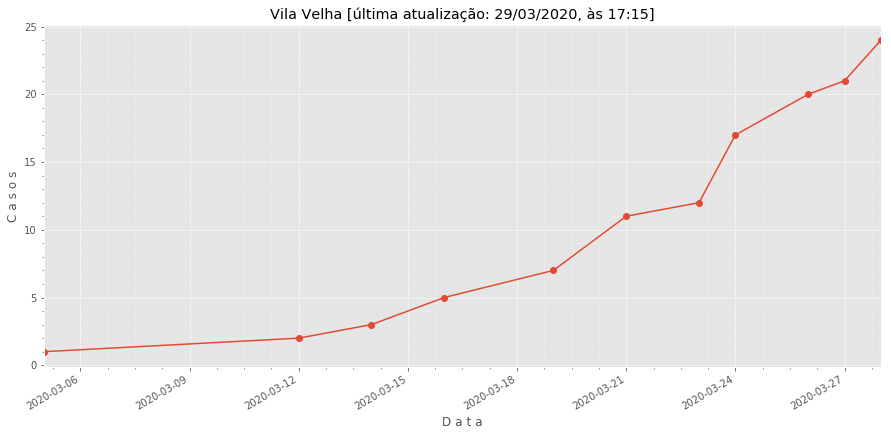

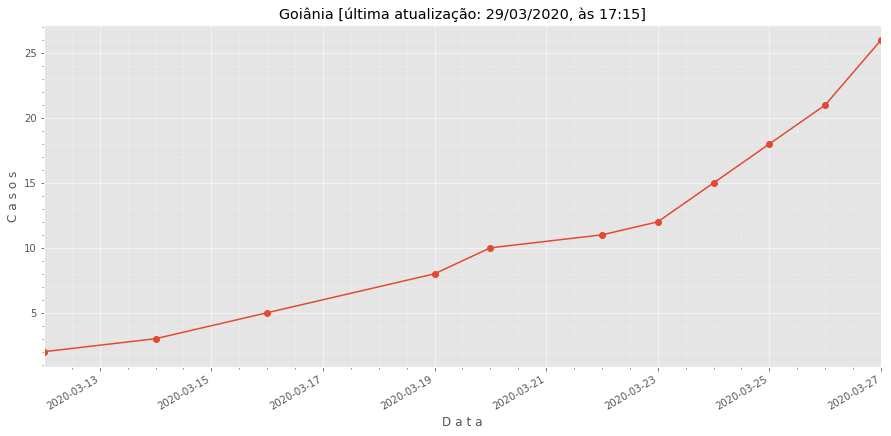

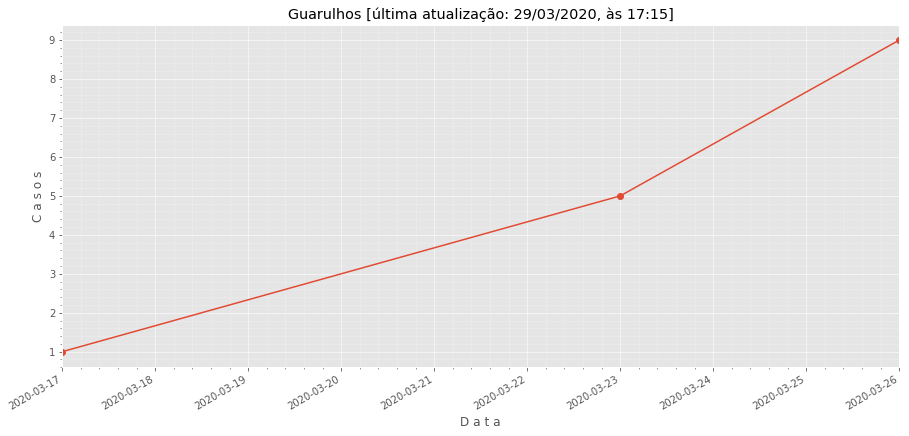

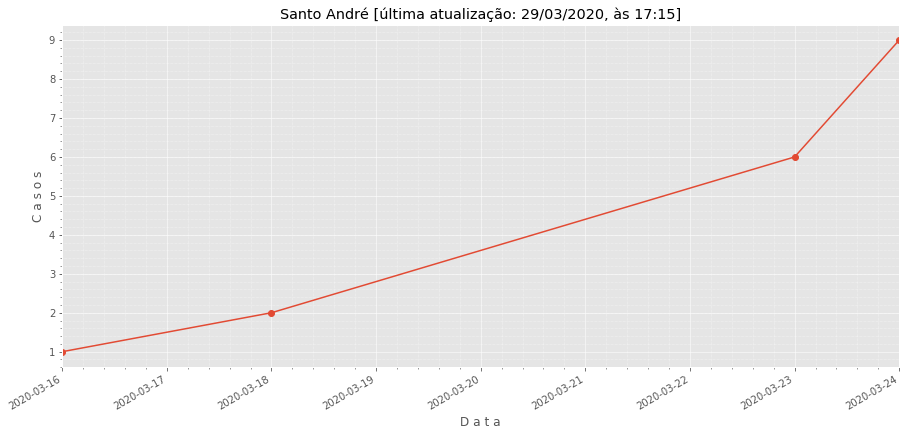

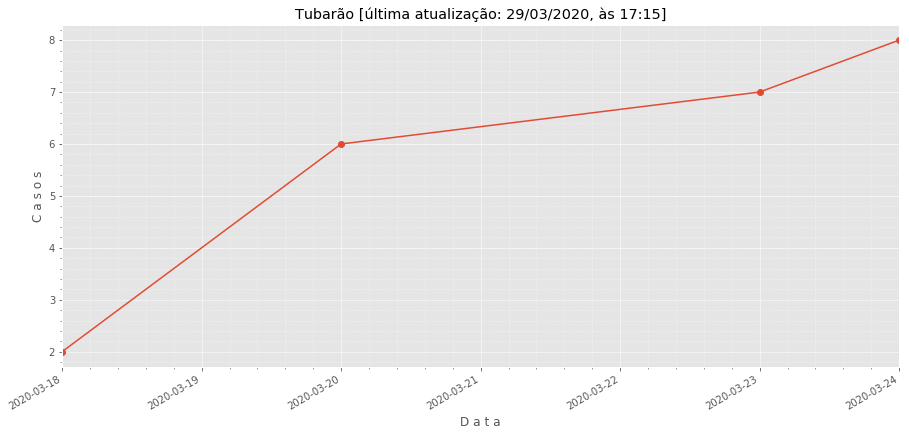

In [152]:
for city in df_json['city_name'].unique()[:top]:
    plot_city_curve(city,updated_at)

### Some checks

In [111]:
df_json['city_name'].unique()[:top]

array(['São Paulo', 'Rio de Janeiro', 'Brasília', 'Fortaleza',
       'Porto Alegre', 'Não informado', 'Manaus', 'Belo Horizonte',
       'Curitiba', 'Niterói', 'Salvador', 'Mossoró', 'Campo Grande',
       'Recife', 'Florianópolis', 'Santo André', '', 'São Caetano do Sul',
       'Rio Branco', 'Boa Vista', 'Blumenau', 'Natal', 'São Luís',
       'São Bernardo do Campo', 'Vila Velha', 'Itajaí', 'Goiânia',
       'Aracaju', 'Vitória', 'Volta Redonda', 'Cuiabá', 'Nova Lima',
       'Guarulhos', 'Maringá', 'Cotia', 'Juiz de Fora', 'Tubarão',
       'Divinópolis', 'Mogi das Cruzes', 'Criciúma'], dtype=object)

In [128]:
df_json[df_json['city_name'] == 'Santo André'].sort_values(by='date', ascending=True)

,cases,city_cod,city_name,count,date,state,state_cod
680,1,3547809.0,Santo André,1,2020-03-16,SP,35.0
687,1,3547809.0,Santo André,2,2020-03-18,SP,35.0
724,4,3547809.0,Santo André,6,2020-03-23,SP,35.0
733,3,3547809.0,Santo André,9,2020-03-24,SP,35.0


In [129]:
df_json[df_json['city_name'] == ''].sort_values(by='date', ascending=True)

,cases,city_cod,city_name,count,date,state,state_cod
647,7,NaN,,7,2020-03-28,GO,NaN


In [133]:
df_json.query('city_name == ""')

,cases,city_cod,city_name,count,date,state,state_cod
647,7,NaN,,7,2020-03-28,GO,NaN
